# Behavioral foundation for commercial non-profits in finance
## Competitive contracts
**Karna Basu and Jonathan Conning**

Department of Economics
Hunter College

In [1]:
%reload_ext watermark
%watermark -u -n -t 

Last updated: Tue Nov 10 2015 13:19:20 


**Abstract:** We explore new behavioral microfoundations for a theory of 'commercial non-profits.' In the spirit of Henry Hansmann's suggestion that in low regulation environments non-profits serve as "a crude form of consumer protection" our theory helps understand therole and ubiquity of non-profit and 'hybrid' (e.g. for-profits owned and/or controlled to varying degrees by socially-minded investors) financial intermediaries in low income markets.  However, where Hansmann (1996) and others have focused on asymmetric information problems -- the idea that nonprofits might prevail where patrons are "incapable of observing with any accuracy either the quantity or quality of the goods or services that the firm has contracted to provide to them" -- we draw attention to a different problem: the firm's willingness and incentive to pander to or 'exploit' their customers' self-control problems.  This is an issue that arises even when all parties are symmetrically informed and sophisticated.

Sophisticated present-biased consumers are aware of their later period selves' impulse to renegotiate (or refinance) consumption smoothing plans to achieve long-term savings or loan repayment goals.  This creates a demand for commitment contracts that restrict their later period selves' to not renegotiating carefully laid out plans.  A pure for-profit financial intermediary may find it hard to credibly commit to not offering such refinancing options at later dates because clients understand full well that the intermediary can profit by doing so.  This limits the pure for-profit firm to offering credible but costly renegotiation-proof contracts that reduce the gains to trade.  In such circumstances a commercial non-profit which has adopted a legal ownership/governance structure which places limits on the distribution of profits may be in a position to offer more attractive contracts that pure for-profits.  We show how different equilibrium market and ownership structures may emerge depending on parameters of the economic environment, and apply the insights to a discussion of the development of modern microfinance and consumer finance in history. 



This (draft of an) Ipython notebook is not the main paper.  It emphasizes only some of the elements of the paper, highlighting a few elements and extensions to the theoretical model and the python code that generates figures and simulations.  

## The model

The paper describes a slightly more general multi-period model but here we specialize it to a three period setting where savers-cum-borrowers have constant relative risk aversion (CRRA) utility. In any period the consumer's instantaneous utility is given by $u(c)=c^{1-ρ}/(1-ρ)$.  Over three period the agent maximizes utility

$$ U(c₀,c₁,c₂)=u(c₀)+β[δu(c₁)+δ²u(c₂)]$$ 

The consumer has an autarky income stream ${y}=\{y_{0},y_{1},y_{2}\}$ which defines autarky or reservation utility $ \overline{u} = U(y₀,y₁,y₂)$ but in general will prefer a smoother consumption profile from contracting on financial markets. 

### The Competitive contract

In an earlier notebook we examined the monopoly lender problem.  Now instead we assume ex-anted competition among lenders to offer contracts to a client.  We assume once the contract has been agreed to the contract becomes exlcusive. 

The offered contract will maximizes the period-0 self's present value of utility $$ U(c_{0},c_{1},c_{2})=u(c_{0})+\beta \left[ \delta u(c_{1})+\delta ^{2}u(c_{2})\right] $$
subject to the bank's zero profit condition

$$\sum\limits_{t=0}^{2}\frac{\left( y_{t}-c_{t}\right) }{\left( 1+r\right) ^{t}} = 0$$

The client may save or borrow, depending on their initial income stream and preferred/feasible smoothed consumption stream available from contracting.  

The first order conditions imply $u^{\prime }(c_{o})=\beta \delta (1+r)u^{\prime }(c_{1})=\beta \delta ^{2}(1+r)^{2}u^{\prime }(c_{2})$. To simplify, let us assume only for presentation purposes that
$$\delta =\frac{1}{1+r}$$
With this simplification the FOC imply $u^{\prime }(c_{1})=u^{\prime }(c_{2})$ and hence that any optimal solution will keep the agent at constant consumption in the last two periods $c_{1}=c_{2}=\overline{c}$.  For CRRA utility $u^{\prime }(c)=c^{-\rho }$ we can use the FOC to find $\overline{c}=\beta ^{\frac{1}{\rho }}c_{0}$. Substituting this into the bank's binding participation constraint then allows us to solve for:
$$\hat{c}_{0} =\frac{\sum y_{i}}{1+2\beta^{1/\rho}}$$


### Python implementation to solve for optimal contracts 

#### Object oriented design the parent 'Contract' class

This ipython notebook solves for optimal contracts between a lender and a client. The python code makes use of Object oriented programming (OOP) ideas for modular design and more compact code. 

First we create a generic 'Contract' class that defines a few attributes (e.g. default parameters of the utility function, initial endowments, etc.) and useful methods to calculate profits, utility, etc. Later we will define MonopolyContract and CompetitiveContract as subclasses that will inherit and extend attributes and methods to solve related models. 

Before anything else, a few commands to import useful python libraries, and notebook settings to ake plots appear inline.

In [2]:
%matplotlib inline
import sys
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams['axes.formatter.useoffset'] = 'False'
np.set_printoptions(precision=2)    # array printing format 

Now the definition of the Contract class.  

In [3]:
import Contract

Let's demonstrate simple use. The following call establishes 'c' as a particular object instance of the Contract class. In this example we then initialize $\beta$ explicitly for this instance. Other attributes (as the value of the income stream y are initialized to default values when c is setup since no value was specified). 

We then call on the print_params method to print out a summary of properties (parameters) of this specific contract c.

In [4]:
c = Contract.Contract(beta = 0.7)
c.print_params()

beta    : 0.7
delta   : 1.0
r       : 0.0
rho     : 0.95
y       : [100 100 100]


Let's plot an indifference curve in c1-c2 space.  For example if the agent in autarky has income $\{y_{0},y_{1},y_{2}\}$ and no access to saving or borrowing then (from period 0 self's perspective) entering period 1 they have reservation utility $u(y_{1})+\delta u(y_{2})=\overline{u}_{0}$.  But when period 1 rolls around their preferences change. From period 1 self's perspective they have reservation utility $u(y_{1})+\beta \delta u(y_{2})=\overline{u}_{1}$.  

### Exclusive competitive contracts

The contract class defines a generic contract which holds consumption stream objects of the form $\left( c_{0},c_{1},c_{2}\right)$ and allows a few manipulations.  Now comes the job of solving for optimal contracts and we do this with a CompetitiveContract class which inherits the attributes and methods of the more generic contract class and then adds a few methods such as calculating the optimal contract full commitment and renegotiation-proof contracts in the competitive lender case.  Note that the methods have the same names as the mon_contract class but some behave differently, reflecting the reversed objective and constraint.


#### Full-commitment contracts

When the competitive lender can commit to not-renegotiating the contract (i.e. to not pandering to the period-1 self's desire to renegotiate period-0's contract) and the contracts are exclusive (so no third party lender will enter to offer such renegotiation either) the contract solves

$$\max \  u\left( c_{0}\right) +\beta \left[ \delta u\left( c_{1}\right) +\delta ^{2}u\left( c_{2}\right) \right] $$

subject to the zero profit constraint
$$s.t.  (y_{0}-c_{0})+\frac{(y_{1}-c_{1})}{(1+r)}+\frac{(y_{2}-c_{2})}{(1+r)^{2}}  \geq 0$$


When $\delta =\frac{1}{(1+r)}$ for the CRRA case an optimum will set $c_{1}=c_{2}=\overline{c}$ and $\overline{c}=\beta ^{\frac{1}{\rho }}c_{0}$ from which a closed form solution can be easily found (see fcommit() function below for formulas).

**Note** that we are here assuming that the consumer has no choice but to consume their income stream $y$ under autarky.  This would be true if the agent does not have acess to any 'own savings' technologies.  Later below we see how things change only slightly when we allow them to use own savings to create a slightly more smooth autarky consumption stream (not perfectly smooth because they cannot overcome their self-control problems on their own).

#### Renegotiaton-proof contracts

***[THIS EXPLANATION HAS NOT BEEN UPDATED YET]***
The agent's period-1-self's preferences differ from those of his period 0 self so they will often want to renegotiate any contract their period 0 self contracted, and the bank can profit from this renegotiation so long as its renegotiaton cost $\kappa $ is low.   In particular if the period-0-self agreed to contract $\left( \bar{c}_{0},\bar{c}_{1},\bar{c}_{2}\right) $ a competitive firm would offer to renegotiate the remaining $(\bar{c}_{1},\bar{c}_{2})$ to contract $\left( c_{1}^{r},c_{2}^{r}\right) $ chosen to maximize

$$\max \ \ u(c_{1})+\beta (\delta u(c_{1}) +\delta^{2} u(c_{2})) $$
subject to $$(y_{1}-c_{1})+\frac{(y_{2}-c_{2})}{(1+r)} \geq 0$$


We can show from the agent's first order conditions for the CRRA case that a renegotiated contract will always satisfy $c_{2}=\beta ^{\frac{1}{\rho }}c_{1}$ and indeed for CRRA we get the closed form:
$$ \hat{c}_{0} =\frac{\sum y_{i}}{1+2\beta^{1/\rho}}$$

and $c_{2}^{r}(\bar{c}_{1},\bar{c}_{2})=\beta ^{\frac{1}{\rho }}c_{1}^{r}(\bar{c}_{1},\bar{c}_{2})$.  See the reneg(c) function.

A sophisticated present-biased consumer anticipates that this type of renegotiation may happen and will only agree to renegotiation-proof contracts that do not renegotiate to favor their period 1 selves.  The profit-maximizing renegotiation-proof contract solves


$$\max_{c_{0},c_{1},c_{2}}\Pi \left( c_{0},c_{1},c_{2}\right) $$
$$U(c_{0},c_{1},c_{2})\geq U_{0}(y_{0},y_{1},y_{2})$$
$$\Pi \left( c_{1}^{r},c_{2}^{r}\right) -\Pi \left( c_{1},c_{2}\right) \leq \overline{\kappa }$$
The first constraint is the period 0 self's participation constraint and the second is the no-renegotiation proof constraint that the bank not find it profitable to offer to renegotiate to the contract that period-1 self will demand.

Let's create an object instance which we will call cM, printout the parameters associated with this instance and then run a few checks to make sure the cM.reneg function works right:

In [5]:
cC = Contract.Competitive(beta = 0.5)
cC.rho = 0.95
cC.y = [110,95,95]
cC.print_params()

beta    : 0.5
delta   : 1.0
guess   : [100 100 100]
kappa   : 0
r       : 0.0
rho     : 0.95
y       : [110, 95, 95]


In [24]:
cC.beta**(1/cC.rho)

0.48208799897124754

###Full commitment contract: closed form solution
#### Case 1: where potential renegotiation surplus goes to consumer

In [7]:
#Analytically calculated renegotiation proof when kappa=0
def ccrpa(C):
    B = C.beta**(1/C.rho)
    D = 1/(1+(1+B)*((C.beta+B)/(1+B))**(1/C.rho))
    c0 = sum(C.y)*D
    c1 = (sum(C.y)-c0)/(1+B)
    c2 = B* c1
    return np.array([c0, c1, c2])

cCRPa =ccrpa(cC)
print(cCRPa, cC.PVU(cCRPa,1))

[ 152.98   99.2    47.82] 75.1545674969


In [8]:
# Let's find reneg-proof contract for pure profit with zero reneg. cost
cCF=cC.fcommit()
cC.kappa = 0
cC.guess = cCRPa
cCR = cC.reneg(cCF)
cCRP = cC.reneg_proof().x
cCRP

array([ 152.83,   99.3 ,   47.87])

In [9]:
# compare three contracts (string label into var name)
print('kappa = ',cC.kappa)
print('y =',cC.y)
print("consumption and net saving in each period")
for con in ['cCF ', 'cCR ', 'cCRP','cCRPa']:
    C = eval(con)
    y = cC.y
    print(con + "       : {}  sum   : {:4.0f}"
          .format(C, C.sum()))
    print(con + "(net s): {}     profit: {:4.2f}"
          .format(y - C, cC.profit(C,cC.y)))
   
    print("PVU0: {:4.3f} {}  b*[]: {:4.3f}"
          .format(cC.PVU(C,cC.beta),cC.u(C),
                cC.beta*cC.u(C)[1:].sum() ))
    print("PVU(1): {:4.4f}"
          .format(cC.PVU(C[1:],cC.beta)))
    print("rate: {:4.2f}%".format(-100*(C[1:].sum()-sum(y[1:]))/C[0] ))
    print()

kappa =  0
y = [110, 95, 95]
consumption and net saving in each period
cCF        : [ 152.74   73.63   73.63]  sum   :  300
cCF (net s): [-42.74  21.37  21.37]     profit: 0.00
PVU0: 50.513 [ 25.72  24.8   24.8 ]  b*[]: 24.796
PVU(1): 37.1941
rate: 27.98%

cCR        : [ 152.74   93.63   45.14]  sum   :  292
cCR (net s): [-42.74   1.37  49.86]     profit: 8.50
PVU0: 50.364 [ 25.72  25.1   24.2 ]  b*[]: 24.646
PVU(1): 37.1941
rate: 33.54%

cCRP       : [ 152.83   99.3    47.87]  sum   :  300
cCRP(net s): [-42.83  -4.3   47.13]     profit: 0.00
PVU0: 50.437 [ 25.72  25.17  24.27]  b*[]: 24.719
PVU(1): 37.3036
rate: 28.03%

cCRPa       : [ 152.98   99.2    47.82]  sum   :  300
cCRPa(net s): [-42.98  -4.2   47.18]     profit: 0.00
PVU0: 50.437 [ 25.72  25.17  24.27]  b*[]: 24.718
PVU(1): 37.3017
rate: 28.10%



The bank does not profit from this type of opportunistic renegotiation, if we assume 'competition' at time of renegotiation **although one might argue** that the relation is ex-ante competitive but ex-post favors the bank.

A sophisticated consumer will however anticipate this type of opporunistic renegotiation and only agree to a renegotiation-proof contract.  

As expected the bank's profits are lowered due to its inability to commit to not renegotiate.

Here's a plot.

D:\Users\jconning\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


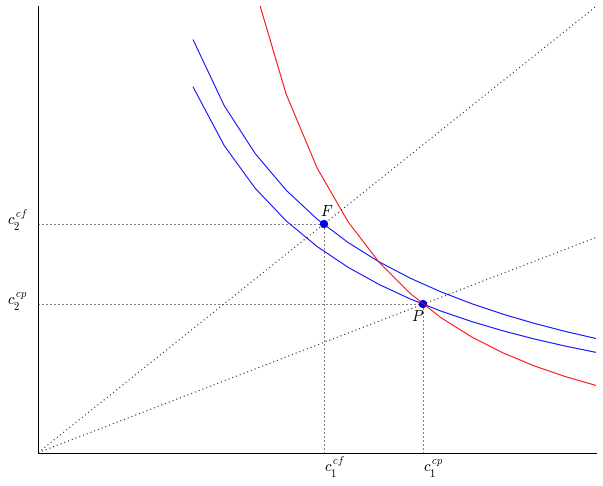

In [10]:
c1min, c1max = np.min(cCR)*0.6, np.max(cC.y)
c1min = 0
c1max = 160
c1 = np.arange(0,c1max,c1max/20)
c1_ = np.arange(40,c1max,c1max/20)
y = cC.y
#cCRP = cCRPa
#indifference curves functions
ubar0 = cC.PVU(cCF[1:3], 1.0)
idc0 = cC.indif(ubar0, 1.0)
ubar1 = cC.PVU(cCF[1:3],cC.beta)
idc1 = cC.indif(ubar1,cC.beta)
ubar0RP = cC.PVU(cCRP[1:3], 1.0)
idc0RP = cC.indif(ubar0RP,1.0)
ubar1RP = cC.PVU(cCRP[1:3], cC.beta)
idc1RP = cC.indif(ubar1RP,cC.beta)


fig, ax = plt.subplots()
# trick to display contract points and coordinate lines http://bit.ly/1CaTMDX
xx = [cCF[1], cCRP[1]]
yy = [cCF[2], cCRP[2]]
plt.scatter(xx,yy, s=50, marker='o',color='b')
[plt.plot([dot_x, dot_x] ,[0, dot_y],':',linewidth = 1,color='black' ) for dot_x, dot_y in zip(xx,yy) ] 
[plt.plot([0, dot_x] ,[dot_y, dot_y],':',linewidth = 1,color='black' ) for dot_x, dot_y in zip(xx,yy) ]

# indifference curves
plt.plot(c1_,idc0(c1_),color='blue')          
#plt.plot(c1_,idc1(c1_),color='red') 
plt.plot(c1_,idc0RP(c1_),color='blue')
plt.plot(c1_,idc1RP(c1_),color='red')
# rays
plt.plot(c1, c1,':',color='black')
plt.plot(c1, cC.beta**(1/cC.rho)*c1,':',color='black')
# isoprofit line(s)
#isoprofline = cC.isoprofit(cC.profit(cMF,cC.y)-(y[0]-cCF[0]), y)
#plt.plot(c1,  isoprofline(c1),':' )

ax.spines['right'].set_color('none'), ax.spines['top'].set_color('none')
plt.ylim((c1min, c1max*0.9)), plt.xlim((c1min, c1max*0.9))
ax.xaxis.tick_bottom(),ax.yaxis.tick_left()
plt.xlabel('$c_{1}$'); plt.ylabel('$c_{2}$')

# label the points
ax.text(cCF[1]-1, cCF[2]+3, r'$F$', fontsize=15)
ax.text(cCRP[1]-3, cCRP[2]-5, r'$P$', fontsize=15)
ax.text(cCRP[1], -6, r'$c^{cp}_{1}$', fontsize=15)
ax.text(-8, cCRP[2], r'$c^{cp}_{2}$', fontsize=15)
ax.text(cCF[1], -6, r'$c^{cf}_{1}$', fontsize=15)
ax.text(-8, cCF[2], r'$c^{cf}_{2}$', fontsize=15)

#ax.text(0, -10, r'Competitive $\kappa = {}$'
#        .format(cC.kappa), fontsize=12)
#ax.text(0, -15, r'$\beta = {}, \  \rho = {}$'
#        .format(cC.beta, cC.rho), fontsize=12)

# isoprofit lines could be plotted like so
#isop  = cC.isoprofit( cC.kappa, cCRP)   # returns a function of c1 
#plt.plot(c1_, isop(c1_),':')
#turn off the axis numbers
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.savefig('figs\CompetitiveFig.eps', format='eps')
plt.show()

In [11]:
# isoprofit lines could be plotted like so
# isop  = cM.isoprofit( 0.0, cM.y)   # returns a function of c1 
# plt.plot(c1, isop(c1))

In [12]:
for cont in ['cCF ', 'cCR ', 'cCRP', 'cCRPa']:
    print(cont +":", eval(cont))

cCF : [ 152.74   73.63   73.63]
cCR : [ 152.74   93.63   45.14]
cCRP: [ 152.83   99.3    47.87]
cCRPa: [ 152.98   99.2    47.82]


##Optimal contract when renegotiation cost $\kappa $ >0

Plot to explore how the renegotiation cost $\kappa $ affects the terms of the contract and firm profits

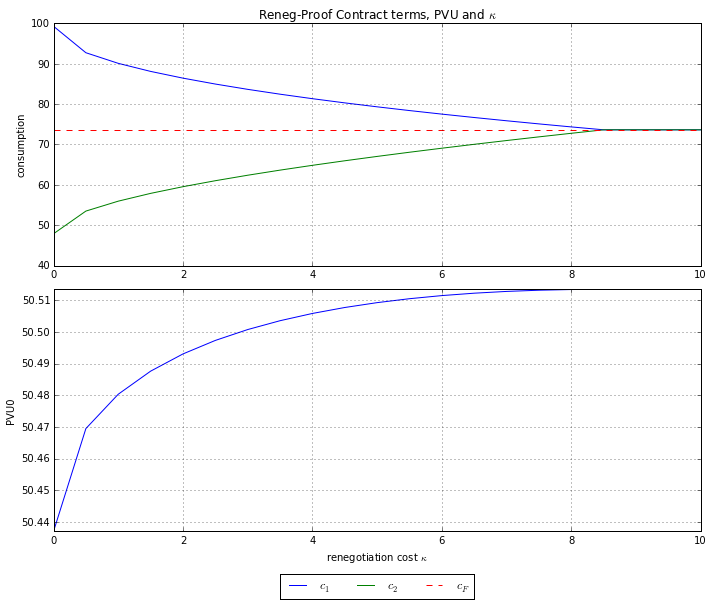

In [13]:
# Note:  re-run all cells above if the plot seems wrong
cC.y = np.array([100,100,100]) 
cCF = cC.fcommit()
num_pts = 21
kaps = np.linspace(0, 10, num_pts)      # different renegotiation cost values 
cCRP, pvu0RP = np.zeros((3,num_pts)), np.zeros(num_pts)  # init (c0,c1,c2) and profits at each kappa

for i in range(0,num_pts):               # look through kappa recalculating optimal contract each time
    cC.kappa = kaps[i] 
    cCRP[:,i] = cC.reneg_proof().x 
    pvu0RP[i] = cC.PVU(cCRP[:,i],cC.beta)

c0,c1,c2 = cCRP[0,:], cCRP[1,:],cCRP[2,:]                # save results for plotting

fig, (ax0, ax1) = plt.subplots(nrows = 2)
#ax0.plot(kaps, c0, label='$c_{0}$')
ax0.plot(kaps, c1, label='$c_{1}$')
ax0.plot(kaps, c2, label='$c_{2}$')
ax0.plot(kaps, np.ones(num_pts)*cCF[1], '--', label='$c_{F}$')
ax0.grid()
ax0.set_title('Reneg-Proof Contract terms, PVU and $\kappa$'), ax0.set_ylabel('consumption')
ax0.legend(loc=9,bbox_to_anchor=(0.5, -1.25), ncol = 3)

ax1.plot(kaps, pvu0RP)
ax1.set_ylabel('PVU0')
ax1.grid()
ax1.set_xlabel('renegotiation cost $\kappa$')
pvumin,pvumax = min(pvu0RP), max(pvu0RP)
plt.ylim((pvumin, pvumax))
plt.tight_layout()
plt.show()

At lower renegotiation costs the bank is forced to offer less consumption smoothing in periods 1 and 2 as a way to credibly commit to limit their gains to renegotiation with a period 1 self.  Hence bank profits rise with their ability to commit to incur a renegotiation cost $\kappa$

We haven't plotted $c_{0}$ for each $\kappa$ but that's because it varies less relative to $c_{1}, c_{2}$ and way above the full commitment consumption smoothing. The following shows a non-monotonic relation though ws should remember this is varying very little.

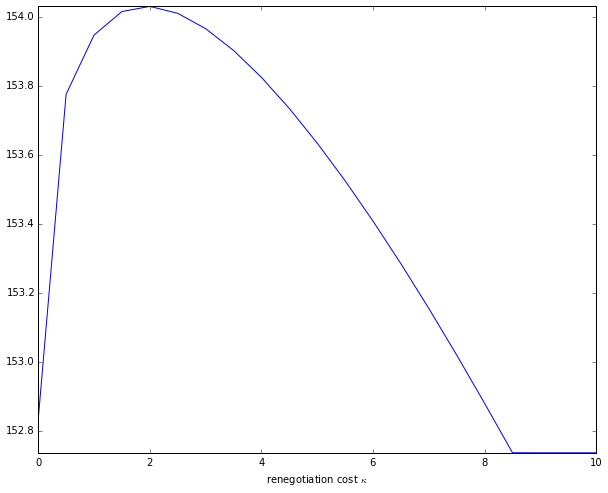

In [14]:
plt.plot(kaps, c0) 
plt.ylim((min(c0), max(c0)))
plt.xlabel('renegotiation cost $\kappa$')
plt.show()

### The choice to become a commercial non-profit

### Modeling the non-profit

The no-renegotiation constraint has two parts.  A pure for-profit captures fraction $\alpha = 1$ of profits and faces renegotiation cost 
not-for-profit of type $\alpha$ and faces renegotiation cost $h(\alpha) = h(1)$.  More generally a non-profit of type $\alpha$ has a no-renegotiation constraint of the form 
$$\alpha \left[ \Pi ^{R}-\Pi \right] \geq h(\alpha )$$

To be specific here let's model this as 
$$h(\alpha )=\kappa \left( 1-\alpha \right) $$

So that at $\alpha =1$ there is no cost to renegotiation and at $0< \alpha <1$ there is a non-negative non-pecuniary cost of up to $\kappa$.  The constraint can then be written as 
$$\left[ \Pi ^{R}-\Pi \right] \geq C(\alpha )=\frac{h(\alpha )}{\alpha }$$

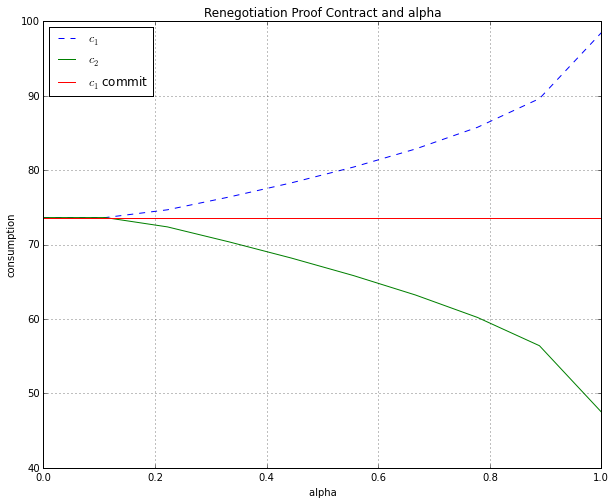

In [15]:
# Similar to above but solve for contract as a function of firm type ALPHA
y = np.array([100,100,100])          # To see how endowment affects contract
cC.y     = y                            
cCF      = cC.fcommit()
num_pts  = 10
alphs    = np.linspace(0.0,1.0,num_pts)   # iterate over different values of beta
HA       = 10*(np.ones(num_pts) - alphs)   #  h(alpha)/alpha  or cost of renegotiaton
cCRP     = np.zeros((3,num_pts))          # matrix for (c0,c1,c2) at each kappa
pvu0RP   = np.zeros(num_pts)  #PVU0 when contracting with alpha=1 firm

for i in range(0,num_pts):
    cC.kappa = HA[i]                 # change optimal contract
    cCRP[:,i] = cC.reneg_proof().x 
    cC.guess =  cCRP[:,i]                 # use this sol as guess for next optimum
    pvu0RP[i] = cC.PVU(cCRP[:,i],cC.beta)
    
#last entry is 'pure profit' pvu0RP[-1]
pvu0RP_pure = pvu0RP[-1]

c0,c1,c2 = cCRP[0,:], cCRP[1,:],cCRP[2,:]                # save results for plotting

fig3 = plt.figure()  
plt.plot(alphs,c1,'--',label='$c_{1}$')
plt.plot(alphs,c2,label='$c_{2}$')
plt.plot(alphs,np.ones(num_pts)*cCF[1],label='$c_{1}$ commit')
plt.grid()
plt.title('Renegotiation Proof Contract and alpha' )
plt.xlabel('alpha ')
plt.ylabel('consumption')
plt.legend(loc='upper left')
plt.show()

### 'Commercial' non-profits 
A 'pure' for profit (with $\alpha$=1.0) earns a reduced (possibly negative) profit due to it's inability to commit. Seen in the plot as profits the height of the horizontal line.

Any non-profit with $\alpha$ above about 0.4 and below 1.0 can better commit to not renegotiate a larger set of contracts and therefore can offer a more profitable renegotiation-proof contract. Even though they capture only fraction $\alpha$ of those profits, the take home profits exceed the profits of the pure for-profit. 

D:\Users\jconning\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


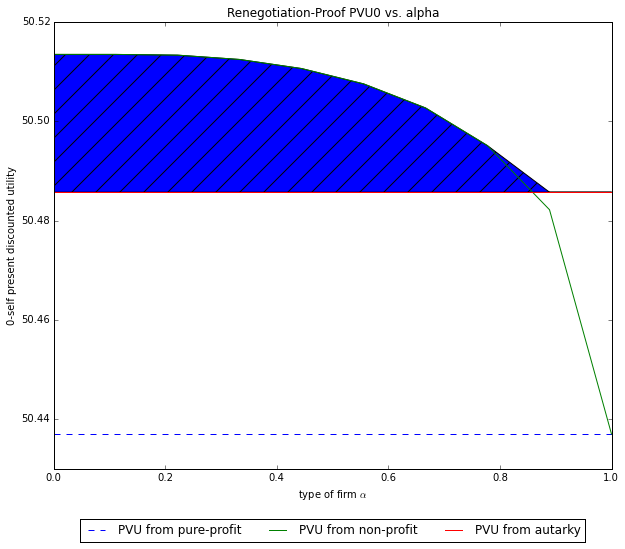

In [16]:
cC.y = [130,85,85]  
#last entry is 'pure profit' pvu0RP[-1]
pvu0RP_full = pvu0RP[-1]*np.ones(num_pts)
pvu0_aut  = cC.PVU(cC.y,cC.beta)*np.ones(num_pts)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Renegotiation-Proof PVU0 vs. alpha')
plt.xlabel(r'type of firm $ \alpha$')
plt.ylabel('0-self present discounted utility')
plt.plot(alphs,pvu0RP_full,'--',label='PVU from pure-profit')
plt.plot(alphs,pvu0RP,label='PVU from non-profit')
plt.plot(alphs,pvu0_aut,label='PVU from autarky')

ax.fill_between(alphs, np.fmax(pvu0RP,pvu0_aut), pvu0_aut,hatch='/')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=None, ncol=5)
plt.show()

The figure above compares what the customer can get (present discounted utility of period 0 self) from autarky compared to what he could get contracting in a situation with competition and exclusive contracts.

In the particular example ($\beta = 0.5, \rho=0.75, y=[130,85, 85]$) the autarky consumption bundle is rather close to what could be offered via consumption smothing so the total surplus to be divided is not that large.  The pure for profit firm offers a renegotiation proof contract that does such a poor smoothing job that the consumer prefers to stay in authaky.  However a commercial non-profit with alpha below ~ 0.8 offers a smoother contract and hence gains to trade.  

Now as presently modeld that non-profit will of course get zero profits (80% of zero!). We can model instead situations where at any period 1 renegotiation it's the consumer who gives up all surplus since the assumption of exclusive contracts means the period 1 self will be willing to give up quite a bit. Or maybe they Nash bargain.  THese cases might be more realistic. 

We'll get to these in a moment but first lets look at how the above situation depends on the initial y vector. 
 

In [17]:
cC.print_params()

beta    : 0.5
delta   : 1.0
guess   : [ 154.02   98.5    47.48]
kappa   : 0.0
r       : 0.0
rho     : 0.95
y       : [130, 85, 85]


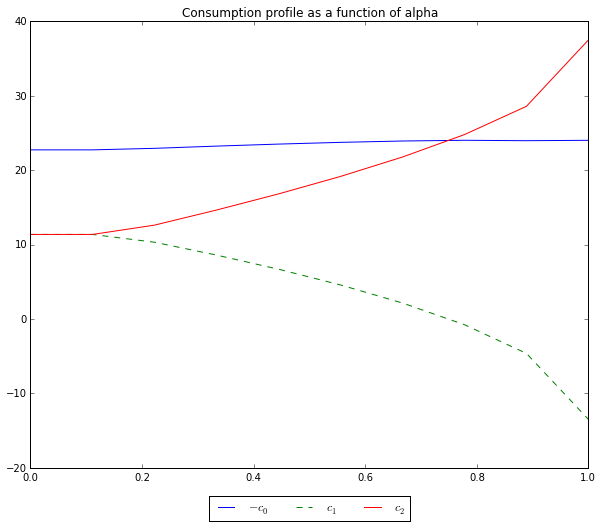

In [18]:
#plot(alphs,cMRP[0,:],label='$c_{0}$')
fig = plt.figure()
plt.plot(alphs,cCRP[0,:]-cC.y[0],label='$-c_{0}$')
plt.plot(alphs,cC.y[1]-cCRP[1,:],'--',label='$c_{1}$')
plt.plot(alphs,cC.y[2]-cCRP[2,:],label='$c_{2}$')

plt.title('Consumption profile as a function of alpha')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=None, ncol=5)
plt.show()

**Loan, repayment and PVU breakdown by periods as function of alpha**
(to be completed...results below are from monopoly case)

In [19]:
#print("alpha      c0     c1    c2        profit = (y0-cMRP0) + (y1-cMRP1) + (y2-cMRP2)")
#print("-"*79)
#for i,a in enumerate(alphs):
#    print("{:5.2f}:   {:6.2f} {:6.2f} {:5.2f},   {:8.2f} = {:8.2f}   + {:8.2f}   + {:8.2f}   "
#          .format(a, cMRP[0,i], cMRP[1,i], cMRP[2,i],profitRP[i],y[0]-cMRP[0,i],y[1]-cMRP[1,i],y[2]-cMRP[2,i],))
#print()

The inability to commit means the renegotiation proof contract doesn't smooth consumption very well for the consumer.  This ends up hurting the bank, since they must now 'compensate' the consumer for the higher variance of consumption if the participation constraint is still to be met.  

The code that follows produces a grid of subplots to illustrate how the results (the relation between $\alpha$ and retained profits) depends on the initial y vector, which in turn also determines whether this will be borrowing or saving.  

##The role of y
###Gains to consumer with diferent firms $\alpha$
Even though it earns zero profits a pure for-profit firm's renegotiation proof contract will offer less consumption smoothing that a firm that due to its non-profit status has higher renegotiation costs.  

NOTE:  some parts of this script need manual adjustment

Left: present discounted U (shaded = NP dominates). Right: net saving in each period as function of α :
[ 120.   90.   90.] 50.4370051775 50.5134973232 50.4553028372 50.4370051775
cCF :  [ 152.74   73.63   73.63]
[ 140.   80.   80.] 50.4370051707 50.5134973232 50.5048334168 50.4370051707
cCF :  [ 152.74   73.63   73.63]
[ 160.   70.   70.] 50.437005196 50.5134973232 50.5106763623 50.437005196
cCF :  [ 152.74   73.63   73.63]


D:\Users\jconning\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


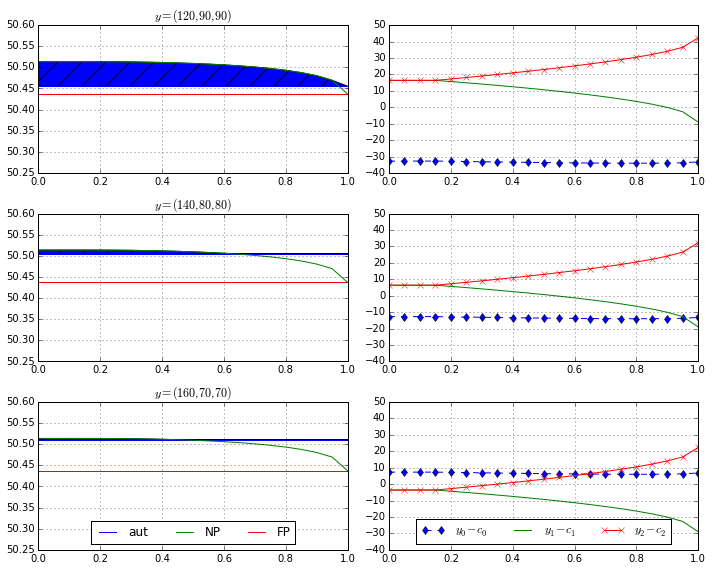

In [20]:
print("Left: present discounted U (shaded = NP dominates). Right: net saving in each period as function of α :")
num_pts  = 21
alphs    = np.linspace(0,1,num_pts)       # iterate over different alphas
HA        = 10*(np.ones(num_pts)-alphs)     # h(alpha)/alpha  or cost of renegotiaton
cCRP     = np.zeros((3,num_pts))             # to store (c0,c1,c2) for each alpha
pvu0RP   = np.zeros(num_pts)  #PVU0 when contracting with alpha=1 firm
pvu0_aut  = cC.PVU(cC.y,cC.beta)*np.ones(num_pts)

fig, ax = plt.subplots(10,sharex=True)
numy0 = 3     # rows of subplots
ax = plt.subplot(numy0,2,1)

# Vary y contracts (maintaining PV at 300 in zero interest rate setting)
for j in range(1, numy0 + 1):  
    y0 = 100 + j*20
    y = np.array([y0,100,100])            
    y = np.array([y0,(300-y0)/2,(300-y0)/2])   
    cC.y = y
    pvu0_aut  = cC.PVU(cC.y,cC.beta)*np.ones(num_pts)
    
    ax1 = plt.subplot(numy0, 2, j*2-1, sharex=ax)  
    for i in range(0, num_pts):
        cC.kappa = HA[i]             # change reneg cost  
        
        cCRP[:,i]    = cC.reneg_proof().x 
        cC.guess     = cCRP[:,i]         # store sol as guess for next search
        pvu0RP[i] = cC.PVU(cCRP[:,i],cC.beta)
   
    #last entry is 'pure profit' pvu0RP[-1]
    #pvu0RP_pure = pvu0RP[-1]
    
    pvu0RP_full = pvu0RP[-1]*np.ones(num_pts) 
    
    # I HAVE NOT YET AUTOMATED THE AXIS BOUNDS
    pumin =  min(pvu0RP[-1],min(pvu0_aut))
    pumax = max(pvu0RP)
    ax1.set_ylim([50.25, 50.6])
    print(y,pumin,pumax,min(pvu0_aut),pvu0RP[-1])
    print("cCF : ",cCF)
    
    pvu0RP_full = pvu0RP[-1]*np.ones(num_pts) 
    ax1.set_title(r'$y=( %2.0f, %2.0f, %2.0f)$' %(y0,y[1],y[2]))
    ax1.plot(alphs, pvu0_aut,label='aut')
    ax1.plot(alphs, pvu0RP,label='NP')
    ax1.plot(alphs, pvu0RP_full,label='FP')
    ax1.fill_between(alphs, np.fmax(pvu0RP,pvu0_aut), pvu0_aut,hatch='/')
    plt.grid()
        
    ax2 = plt.subplot(numy0,2,j*2, sharex=ax, sharey=ax)    # Plot contract terms in right column plot
    #ax1.set_ylim([0, 25])
    ax2.plot(alphs, y0 - cCRP[0,:],"d--",label='$y_0-c_0$')
    ax2.plot(alphs, y[1] - cCRP[1,:],label='$y_1-c_1$')
    ax2.plot(alphs, y[2] - cCRP[2,:],"x-",label='$y_2-c_2$')
    #ax2.axhline(y=0, color ='k')
    #ax2.plot(alphs, y[0]*np.ones(num_pts))
    #ax2.plot(alphs, y[1]*np.ones(num_pts))
    plt.grid()    
ax1.legend(loc='lower center', fancybox=None, ncol=5)
ax2.legend(loc='lower center', fancybox=None, ncol=5)
plt.tight_layout()

plt.savefig('figs\Comp_excl.pdf', format='pdf')
plt.show()    

In [21]:
plt.close('all')

**INTERPRETATION**: The left column of plots above shows renegotiation-proof profits as a function of $\alpha$ where $\alpha$ affects both the share of profits that are captured as well as the cost of renegotiation as described above.  The blue shaded area indicates where commercial non-profits (that choose an $\alpha <1$) capture more profit than a pure for-profit. 

The right column of plots shows the terms of the associated contract displayed as 'net savings' (y0-c0), (y1-c1), and (y2-c2).  When these are positive the client is saving or repaying, when negative they are borrowing.

When we keep the PV of y constant but change the ratio of period zero income y0 to later period income, y vectors that lead to borrowing (lower y0, higher y1,y2) deliver higher full-commitment (and renegotiation-proof) profits at any level of alpha. 

Since most of the profits are in the 0 to 1 period, they weigh more heavily in total profits.  Turning non-profit is only attractive at relatively high values of alpha (since at lower alpha they're forfeiting the period 0-1 profits). At higher y0 (tilted more toward savings) full commitment (and renegotiation-proof) profits are lower The pattern seems to be that as we move toward first period savings...

### NOT FINISHED
Profitability as a function of y0

In [22]:
cM.kappa = 0

NameError: name 'cM' is not defined

In [ ]:
PDV =300
y0_step = 2
y0_start = 50
y0_end = PDV -50
Y0 = range(y0_start,y0_end,y0_step)
n = len(Y0)
profity0 = zeros(n)
profity0B = zeros(n)
i=0

for y0 in Y0:  
    ybar = (PDV-y0)/2
    cM.y =([y0,ybar,ybar])
    cMF = cM.fcommit()
    cMRP = cM.reneg_proof().x
    cM.guess = cMRP
    profity0[i] = cM.profit(cMRP,cM.y)
    profity0B[i] = cM.profit(cMF,cM.y)
    
    i += 1

In [ ]:
plt.plot(profity0,Y0,'b-',label="reneg. proof")
plt.plot(profity0B,Y0,'r',label="full commit")
plt.xlim([-2,6])
plt.ylim([80,160])c

plt.title("Profits as a function of y0")
plt.xlabel("profits $\pi$")
plt.ylabel("y0")
plt.legend(loc='center right')
plt.grid()
plt.axvline()

## Modifications when consumer has a home savings option##
The above ana

In [ ]:
cM.kappa =0
cM.guess = cMF
cMRP = cM.reneg_proof()
cMRP.x

In [ ]:
plot(alphs,C)

In [ ]:
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(alphs, profitRP)
ax1.plot(alphs, NprofitRP)
ax1.plot(alphs,cM.profit(cMF,y)*ones(num_pts))
ax1.grid(True)
ax1.set_title('Sharing both axes')
ax2.plot(alphs, NprofitRP)
ax3.plot(alphs,cM.profit(cMF,y)*ones(num_pts))
show()

## Other Results

### $\beta$ and loan size

Let's plot the the relationship between period 0 loan size in a full-commitment contract and the extent of present-bias captured by $\beta$

In [ ]:
cM = MonopolyContract(0.8)               # create an instance m

num_pts = 21
betas = linspace(0.1,1,num_pts)           # iterate over different values of beta
CMF = zeros((3,num_pts))                  # a three row matrix to store (c0,c1,c2) for each beta

for i in range(0,num_pts):
    cM.beta = betas[i]                    # change beta before recalculating optimal contract
    CMF[:,i] = cM.fcommit()       

loan   = CMF[0,:] - cM.y[0]               # save results for plotting
repay1 = CMF[1,:] - cM.y[1]
repay2 = CMF[2,:] - cM.y[2]

plot(betas,loan,'--')                          # plot    
plot(betas,repay1)
plot(betas,repay2)
grid()
title('Monopoly Commitment Contract as function of beta')
xlabel('beta')
ylabel('net repayment')
legend(['loan','repay1','repay2'])

### Example full commitment contract (and renegotiation with a naive consumer)

Here is an example of the full-commitment contracts a monopolist offers and the contract a monopolist and a naive consumer would renegotiate to from that same full commitment contract (but note that a intermediary who knows they are dealing with a naive consumer would bait them with a different initial contract). 

In [ ]:
cM.beta = 0.8            # Reset to beta = 0.8 case and print out other parameters
cM.params()

In [ ]:
cMF = cM.fcommit()      
cMr = cM.reneg(cMF)       
y = cM.y
print '0-Discounted utility full commit: {0:4.3f}   and   Naive renegotiate: {1:4.3f}'.format(cM.PVU(cMF), cM.PVU(cMr))
print 'Profits from full commit: {0:4.3f}   and   Naive renegotiate:{1:4.3f}'.format(cM.profit(y,cMF), cM.profit(y,cMr))

##### Scratch play area

#### 3D plots

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z, cmap=cm.coolware)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

In [ ]:
cm.cool

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
c0, c1 = np.arange(0,150,1), np.arange(0,150,1)
c2 =  
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()


### Is $c_0$ (and hence net borrowing) higher or lower in renegotiation-proof contracts?
It's going to depend on $\rho$ 

In [28]:
bb = np.arange(0,1,0.05)
bb

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95])

D:\Users\jconning\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


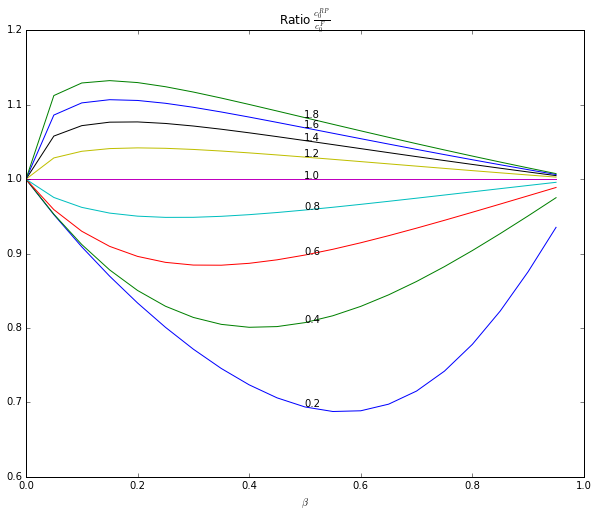

In [63]:
for rh in np.arange(0.2,2,0.2):
    c0RP = 300/(1+bb+bb**(1/rh))
    c0F = 300/(1+2*bb**(1/rh) ) 
    rat = c0RP/c0F
    plt.plot(bb,rat)
    plt.annotate('{:3.1f}'.format(rh),xy=(0.5,rat[len(rat)/2]))
plt.title(r'Ratio $\frac{c_0^{RP}}{c_0^F}$')
plt.xlabel(r'$\beta $')
plt.show()

D:\Users\jconning\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


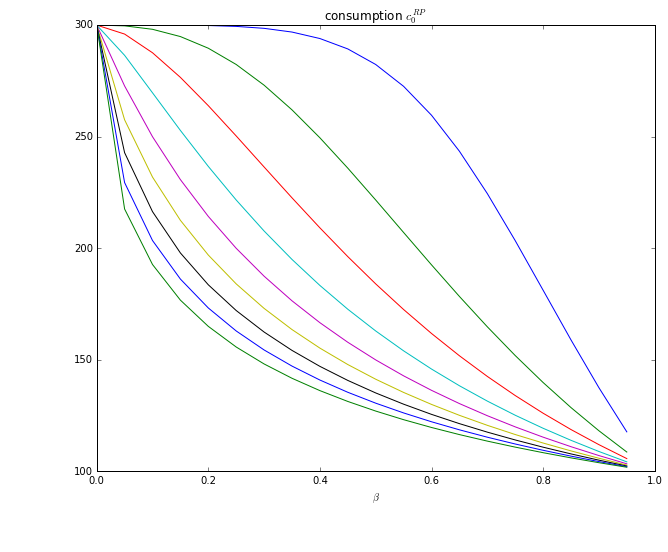

In [66]:
for rh in np.arange(0.2,2,0.2):
    c0RP = 300/(1+bb+bb**(1/rh))
    c0F = 300/(1+2*bb**(1/rh) ) 
    rat = c0RP/c0F
    plt.plot(bb,c0F)
    plt.annotate('{:3.1f}'.format(rh),xy=(0.5,rat[len(c0RP)/2]))
plt.title(r'consumption $c_0^{RP}$')
plt.xlabel(r'$\beta$')
plt.show()